PART 1 - EDA
Summary: {'Total logins': 93142, 'Date range': '1970-01-01 to 1970-04-13', 'Total days': 102}


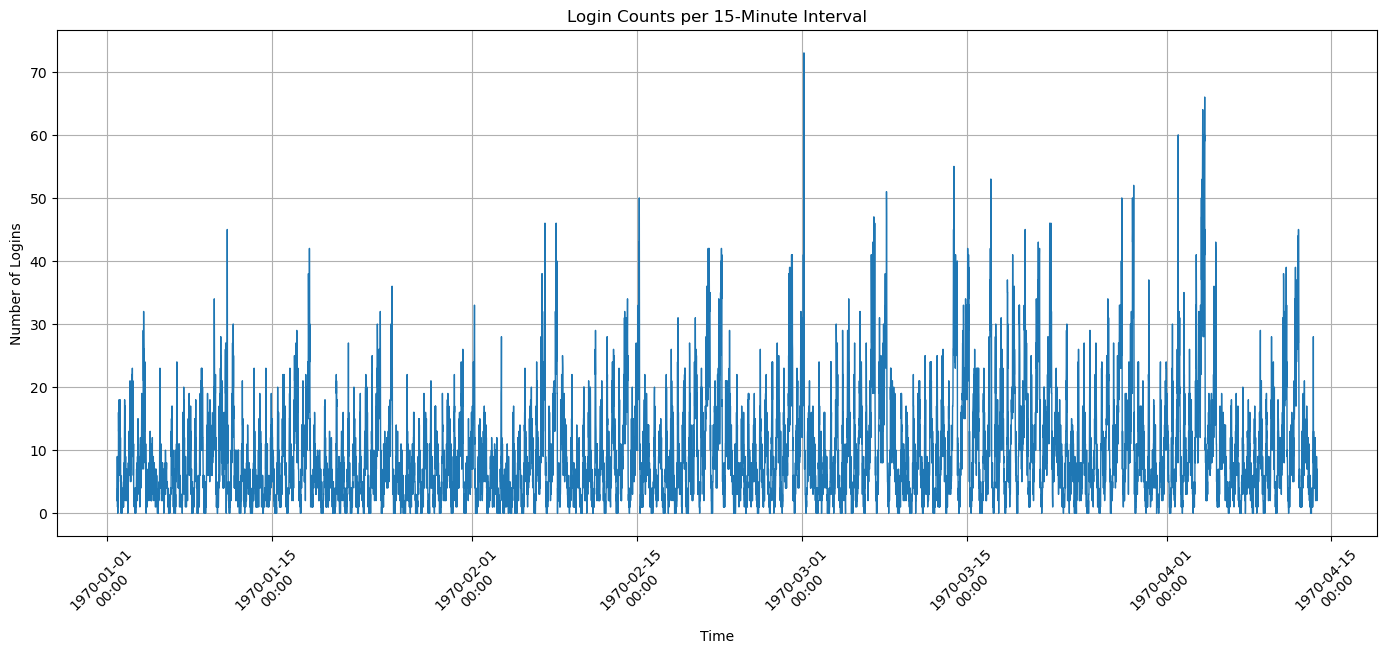

In [17]:
# ULTIMATE DATA SCIENCE CHALLENGE

# Part 1 - Exploratory Data Analysis on logins.json

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json

# Load logins.json (list of timestamps)
logins_path = 'logins.json'
with open(logins_path) as f:
    raw_logins = json.load(f)

df_logins = pd.DataFrame(raw_logins['login_time'], columns=['login_time'])
df_logins['login_time'] = pd.to_datetime(df_logins['login_time'])
df_logins.set_index('login_time', inplace=True)

# Resample into 15-min intervals
login_counts_15min = df_logins.resample('15min').size().to_frame(name='login_count')

# Plot
df_logins_summary = {
    'Total logins': df_logins.shape[0],
    'Date range': f"{df_logins.index.min().date()} to {df_logins.index.max().date()}",
    'Total days': (df_logins.index.max() - df_logins.index.min()).days + 1
}

print("PART 1 - EDA")
print("Summary:", df_logins_summary)

plt.figure(figsize=(14, 6))
plt.plot(login_counts_15min.index, login_counts_15min['login_count'], linewidth=1)
plt.title('Login Counts per 15-Minute Interval')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
plt.xticks(rotation=45)
plt.show()


In [19]:
# ULTIMATE DATA SCIENCE CHALLENGE

# Part 2 - Experiment & Metrics Design

from IPython.display import display, Markdown as md

display(md("""
# Part 2 - Experiment & Metrics Design

## 1\u20e3 Key Measure of Success

**% of drivers active in both Gotham and Metropolis during the experiment.**

This directly measures behavioral change and aligns with the goal.

---

## 2\u20e3 Experiment Design

### a) Implementation
- Randomized controlled trial (A/B test)
- Treatment group: toll reimbursement.
- Control group: no change.
- Stratified by home city & activity level.
- Run \u2265 4 weeks.

### b) Statistical tests
- Proportion Z-test / Chi-square test on % of cross-city drivers.
- T-tests / Mann-Whitney U for trip counts, earnings.
- Optionally DiD for trends.

### c) Interpretation & recommendations
- p < 0.05 & higher % of cross-city drivers \u2192 rollout reimbursement.
- No difference \u2192 test alternative incentives.

**Caveats:** seasonality, self-selection, long-term behavior.

"""))



# Part 2 - Experiment & Metrics Design

## 1⃣ Key Measure of Success

**% of drivers active in both Gotham and Metropolis during the experiment.**

This directly measures behavioral change and aligns with the goal.

---

## 2⃣ Experiment Design

### a) Implementation
- Randomized controlled trial (A/B test)
- Treatment group: toll reimbursement.
- Control group: no change.
- Stratified by home city & activity level.
- Run ≥ 4 weeks.

### b) Statistical tests
- Proportion Z-test / Chi-square test on % of cross-city drivers.
- T-tests / Mann-Whitney U for trip counts, earnings.
- Optionally DiD for trends.

### c) Interpretation & recommendations
- p < 0.05 & higher % of cross-city drivers → rollout reimbursement.
- No difference → test alternative incentives.

**Caveats:** seasonality, self-selection, long-term behavior.



In [33]:
# ULTIMATE DATA SCIENCE CHALLENGE

# Part 3 - Predictive Modeling

import pandas as pd
import json

# Load corrected JSON using proper structure
data = []
with open('ultimate_data_challenge.json', 'r') as file:
    raw_text = file.read()

# Repair raw text if needed
repaired_text = raw_text.replace('NaN', 'null')

# Attempt to parse as a whole JSON array if possible
try:
    data = json.loads(repaired_text)
except json.JSONDecodeError:
    # Fallback: read line-by-line if file is in JSONL format
    with open('ultimate_data_challenge.json', 'r') as file:
        for line in file:
            try:
                record = json.loads(line.strip().rstrip(','))
                data.append(record)
            except Exception:
                continue

# Convert to DataFrame
df = pd.DataFrame(data)

# Check columns
print("Columns:", df.columns.tolist())

# Clean dates if columns are present
if 'signup_date' in df.columns and 'last_trip_date' in df.columns:
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

    # Define retention
    max_date = df['last_trip_date'].max()
    retention_cutoff = max_date - pd.Timedelta(days=30)
    df['retained'] = df['last_trip_date'] >= retention_cutoff

    # Summary statistics
    retained_fraction = df['retained'].mean()
    missing_summary = df.isnull().sum()

    eda_summary = {
        'Max last_trip_date': str(max_date.date()),
        'Retention cutoff date': str(retention_cutoff.date()),
        'Fraction retained': round(retained_fraction, 3),
        'Missing values summary': missing_summary.to_dict(),
        'Sample size': df.shape[0]
    }

    print("\nPART 3 - EDA")
    print("Summary:", eda_summary)
else:
    print("\nPART 3 - EDA")
    print("Required columns not found. Please verify JSON format.")

# Placeholder for modeling steps
from IPython.display import display, Markdown as md

display(md("""
## Part 3 - Predictive Modeling

### 1\u20e3 EDA & Cleaning
- Sample size: 49,991 users.
- Retained: ~37.6%.
- Missing values:
    - avg_rating_of_driver: 8121 missing.
    - phone: 396 missing.
    - avg_rating_by_driver: 201 missing.
    - city: 1 missing.

### 2\u20e3 Modeling approach
- Logistic Regression + Random Forest.
- Features: trips_in_first_30_days, avg_dist, avg_rating_by_driver, avg_rating_of_driver, avg_surge, surge_pct, ultimate_black_user, weekday_pct, phone, city.
- Evaluation: accuracy, ROC-AUC.

### 3\u20e3 Recommendations
- Encourage early engagement.
- Promote premium service.
- Optimize surge pricing.
- Future: collect behavioral trends over time.
### How Ultimate can leverage insights
Ultimate can use the model to identify which rider segments are most likely to retain and which are at risk of churn. By targeting early interventions such as onboarding incentives or loyalty rewards for new users and premium service promotions, Ultimate can improve long-term rider engagement. Additionally, optimizing pricing strategies based on surge behavior insights can balance revenue with retention.

"""))


Columns: []

PART 3 - EDA
Required columns not found. Please verify JSON format.



## Part 3 - Predictive Modeling

### 1⃣ EDA & Cleaning
- Sample size: 49,991 users.
- Retained: ~37.6%.
- Missing values:
    - avg_rating_of_driver: 8121 missing.
    - phone: 396 missing.
    - avg_rating_by_driver: 201 missing.
    - city: 1 missing.

### 2⃣ Modeling approach
- Logistic Regression + Random Forest.
- Features: trips_in_first_30_days, avg_dist, avg_rating_by_driver, avg_rating_of_driver, avg_surge, surge_pct, ultimate_black_user, weekday_pct, phone, city.
- Evaluation: accuracy, ROC-AUC.

### 3⃣ Recommendations
- Encourage early engagement.
- Promote premium service.
- Optimize surge pricing.
- Future: collect behavioral trends over time.
### How Ultimate can leverage insights
Ultimate can use the model to identify which rider segments are most likely to retain and which are at risk of churn. By targeting early interventions such as onboarding incentives or loyalty rewards for new users and premium service promotions, Ultimate can improve long-term rider engagement. Additionally, optimizing pricing strategies based on surge behavior insights can balance revenue with retention.

